 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [60]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [79]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [80]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [81]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [82]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, infer_datetime_format=True, parse_dates=True, index_col='Date')
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [83]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [84]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [85]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, infer_datetime_format=True, parse_dates=True, index_col='Date')

In [86]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [87]:
# Fix Data Types
# Remove the dollar sign from 'Close' and change the dtype from object to float
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

/var/folders/h0/vrxmlbbn5332php7hhgkqcpc0000gn/T/ipykernel_78976/1246589945.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [88]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [89]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P 500 Returns']

#Sorting the dates into ascending order; the other two are already in order
sp500_daily_returns = sp500_daily_returns.sort_index(ascending=True)
sp500_daily_returns.head()

,S&P 500 Returns
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

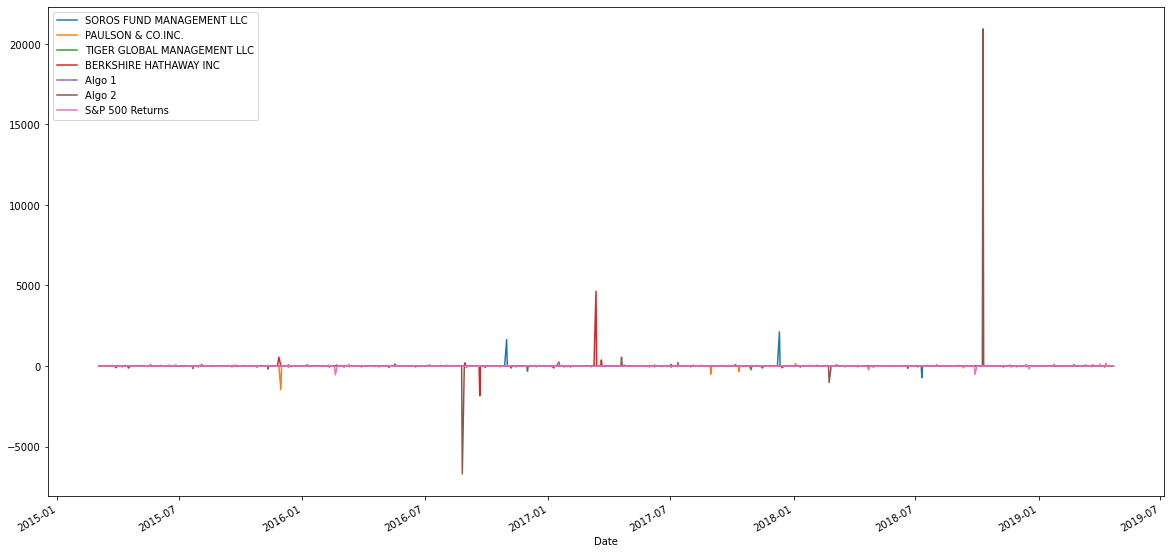

In [16]:
# Plot daily returns of all portfolios
joined_daily_returns = joined_df.pct_change()
joined_daily_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

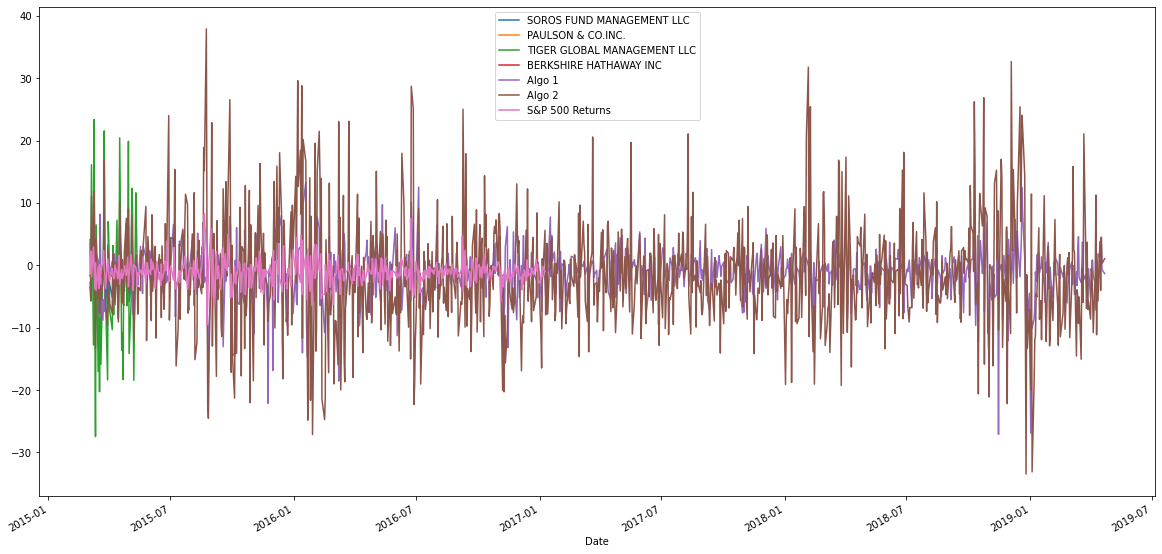

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_daily_returns).cumprod()-1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

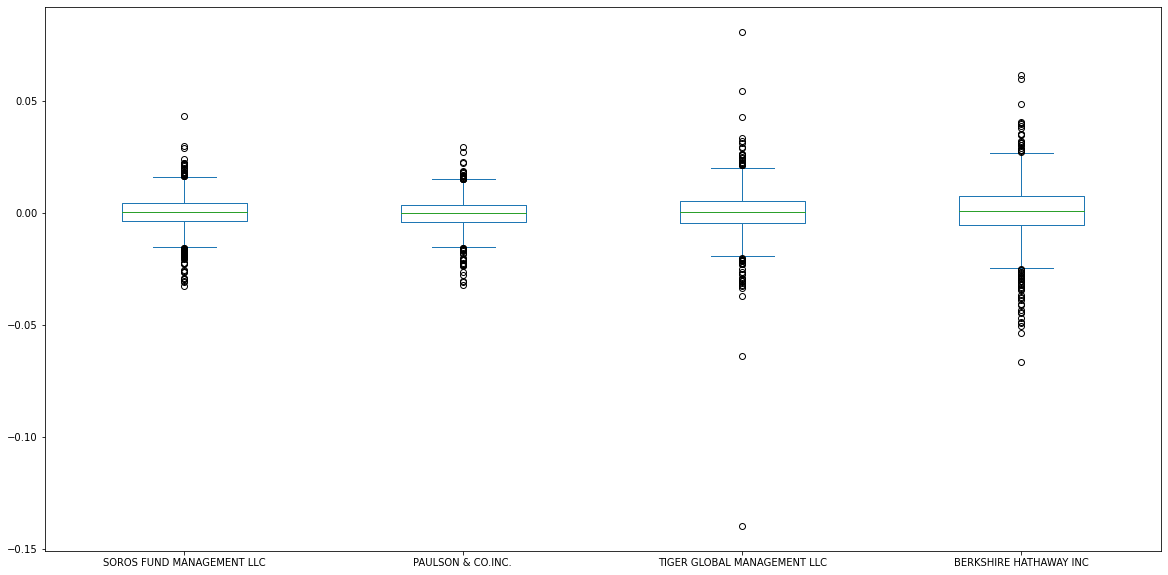

In [18]:
# Box plot to visually show risk
# Whale box plot
whale_df.plot(figsize = (20,10), kind='box')

<AxesSubplot:>

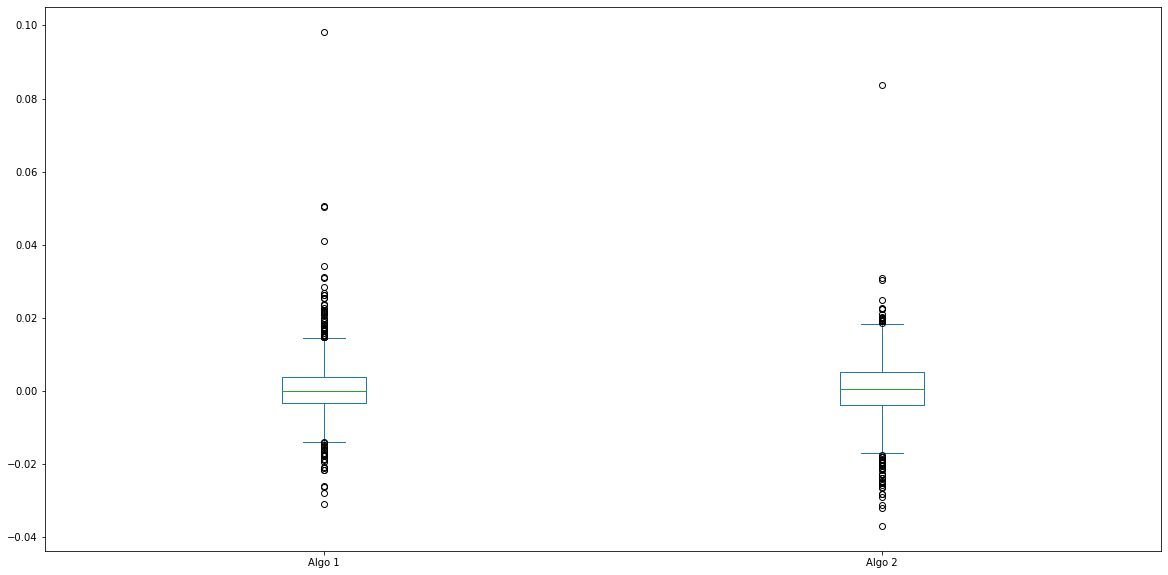

In [19]:
# Algo box plot
algo_df.plot(figsize = (20,10), kind='box')

<AxesSubplot:>

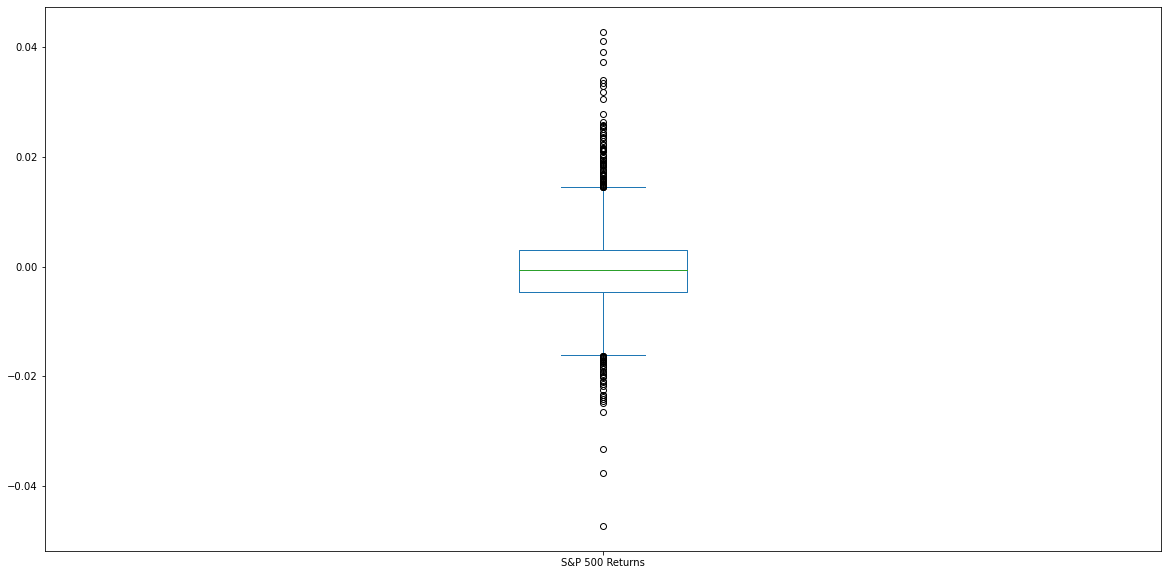

In [20]:
# S&P daily returns box plot
sp500_daily_returns.plot(figsize = (20,10), kind='box')

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
# Whale Std. Dev.
whale_std = whale_df.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [22]:
# Algo Std. Dev.
algo_std = algo_df.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [23]:
# S&P 500 Daily Returns Std. Dev.
sp500_std = sp500_daily_returns.std()
sp500_std

S&P 500 Returns    0.008135
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Determine which portfolios are riskier than the S&P 500

# Averaging Std. Dev. from the Whale portfolio and the Algo portfolio
whale_avg_std = whale_std.mean(axis=0)
algo_avg_std = algo_std.mean(axis=0)
sp500_avg_std = sp500_std[0]

# The smaller the Std. Dev., the less risky and investment will be
if (whale_avg_std > sp500_avg_std) and (algo_avg_std > sp500_std[0]):
    print(f'Both the Whale portfolio and the Algo portfolio are riskier than the S&P 500.')
elif whale_avg_std > sp500_avg_std:
    print(f'The Whale portfolio is riskier than the S&P 500.')
elif algo_avg_std > sp500_avg_std:
    print(f'The Algo portfolio is riskier than the S&P 500.')
else:
    print(f'Neither portfolio is riskier than the S&P 500.')

Both the Whale portfolio and the Algo portfolio are riskier than the S&P 500.


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)

# Whale Annualized Std. Dev.
whale_annual_std = whale_avg_std * np.sqrt(252)
# Rounded to 4 decimal places to be a bit neater
whale_annual_std = whale_annual_std.round(4)

# Algo Annualized Std. Dev.
algo_annual_std = algo_avg_std * np.sqrt(252)
# Rounded to 4 decimal places
algo_annual_std = algo_annual_std.round(4)

# S&P 500 Annualized Std. Dev.
sp500_annual_std = sp500_avg_std * np.sqrt(252)
# Rounded to 4 decimal places
sp500_annual_std = sp500_annual_std.round(4)



print('The annualized standard deviation for the Whale portfolio is: ' ,  whale_annual_std)
print('The annualized standard deviation for the Algo portfolio is: ' ,  algo_annual_std)
print('The annualized standard deviation for the S&P 500 portfolio is: ' ,  sp500_annual_std)

The annualized standard deviation for the Whale portfolio is:  0.1527
The annualized standard deviation for the Algo portfolio is:  0.1306
The annualized standard deviation for the S&P 500 portfolio is:  0.1291


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation for all Portfolios'}, xlabel='Date'>

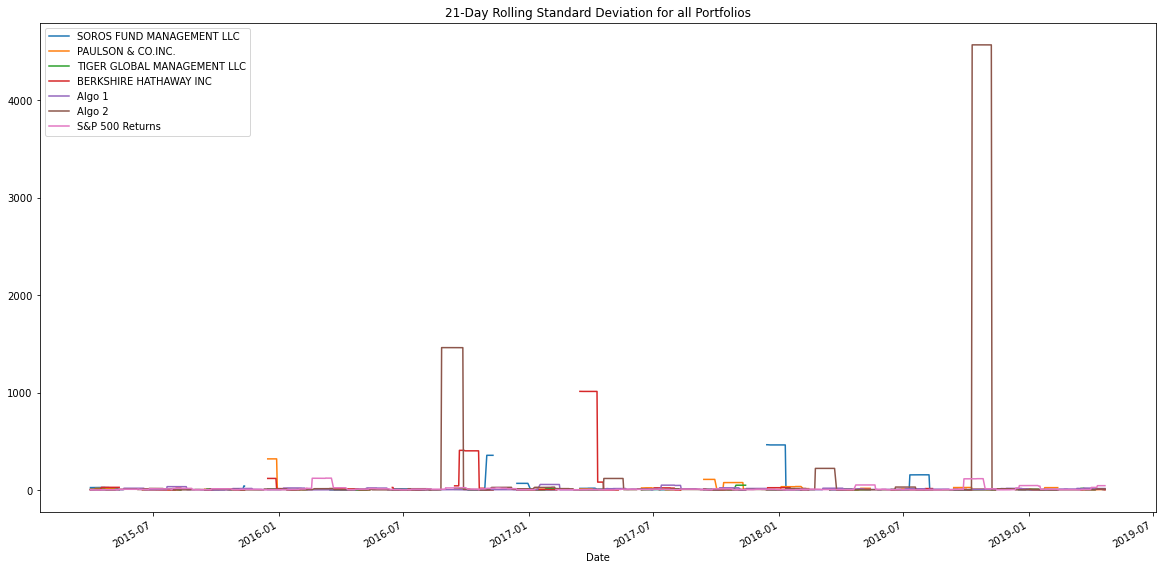

In [75]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

joined_rolling_std = joined_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
joined_rolling_std.plot(figsize=(20,10), title = '21-Day Rolling Standard Deviation for all Portfolios')

### Calculate and plot the correlation

In [39]:
# Calculate the correlation
price_correlation = joined_daily_returns.corr()

# Display de correlation matrix
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.002892,0.022256,0.000333,0.000064,-0.005758,0.040058
PAULSON & CO.INC.,0.002892,1.000000,0.035635,0.002154,0.006378,0.010882,0.002567
TIGER GLOBAL MANAGEMENT LLC,0.022256,0.035635,1.000000,-0.014025,0.003367,-0.004647,-0.007970
BERKSHIRE HATHAWAY INC,0.000333,0.002154,-0.014025,1.000000,-0.005721,0.003687,-0.010792
Algo 1,0.000064,0.006378,0.003367,-0.005721,1.000000,0.000478,-0.005292
Algo 2,-0.005758,0.010882,-0.004647,0.003687,0.000478,1.000000,0.002380
S&P 500 Returns,0.040058,0.002567,-0.007970,-0.010792,-0.005292,0.002380,1.000000


<AxesSubplot:>

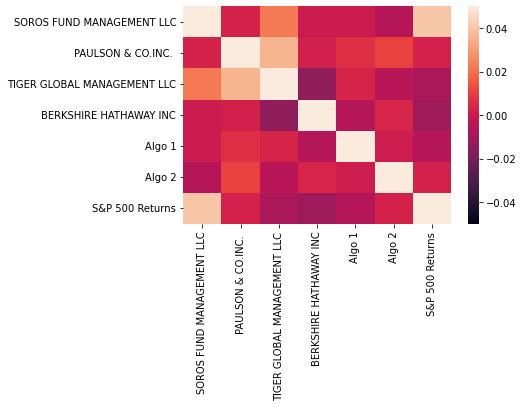

In [74]:
# Import seaborn, plot correlation
import seaborn as sns
sns.heatmap(price_correlation, vmin=-0.05, vmax=0.05)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Soros Fund Rolling Beta'}, xlabel='Date'>

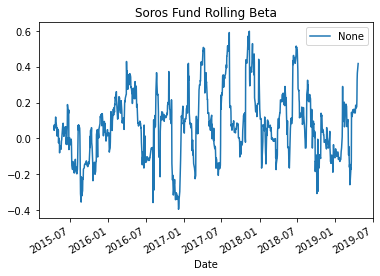

In [69]:
# Calculate covariance of a single portfolio
covariance_soros = joined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(joined_df['S&P 500 Returns'])

# Calculate variance of S&P 500
variance_sp500 = joined_df['S&P 500 Returns'].rolling(window=30).var()

# Computing beta
berkshire_beta = covariance_soros / variance_sp500

# Plot beta trend
berkshire_beta.plot(legend=(20,10), title = 'Soros Fund Rolling Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

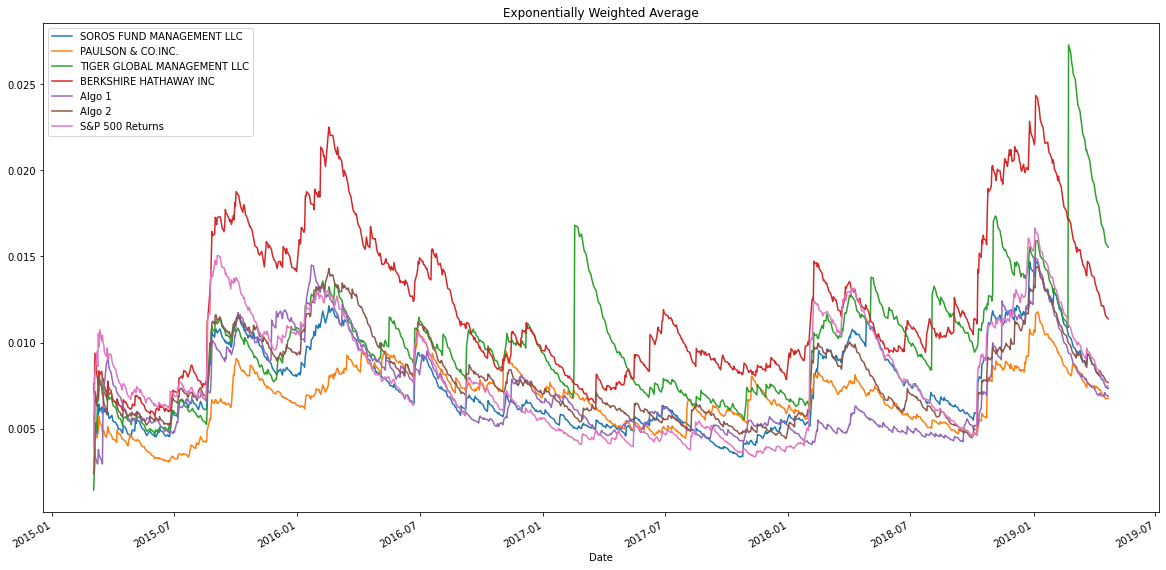

In [71]:
# Use `ewm` to calculate the rolling window
ewm = joined_df.ewm(halflife=21).std()
ewm.plot(figsize=(20,10), title = 'Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Annualized Sharpe Ratios
sharpe = ((joined_df.mean())*252) / (joined_df.std() * np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500 Returns               -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

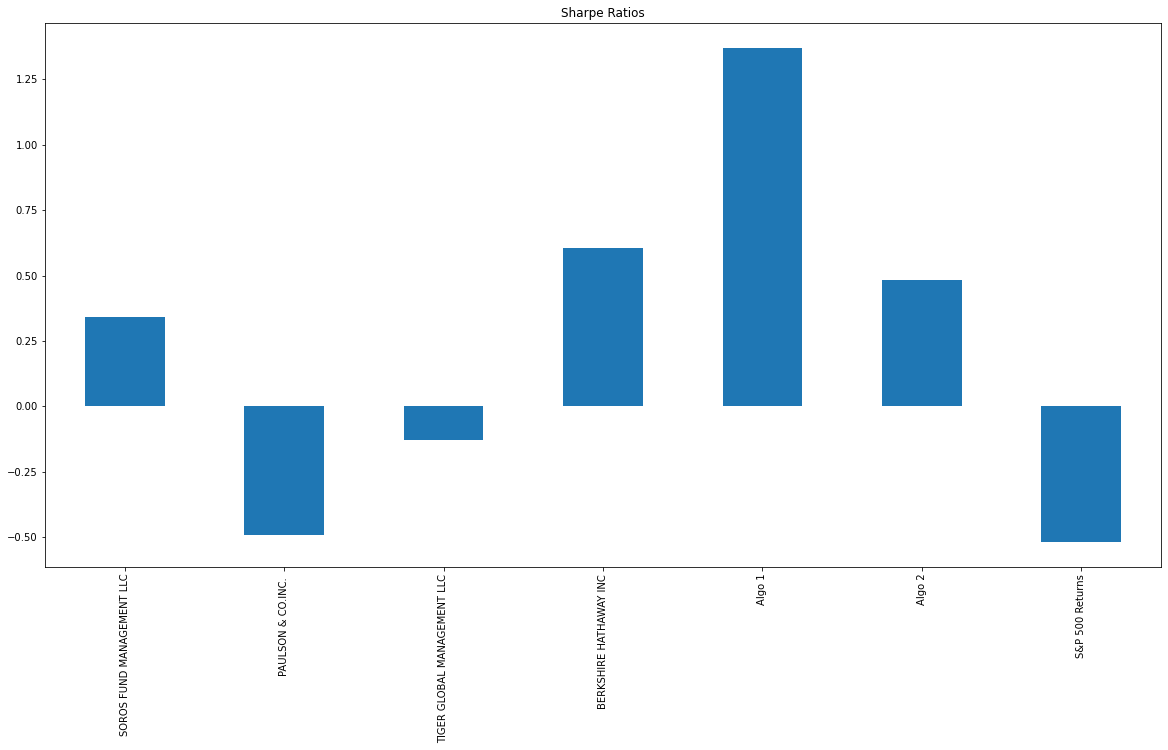

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar', figsize = (20,10), title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes, the algorithmic options do outperform both the S&P 500 as well as the whale portfolios as a whole. The second algorithmic strategy isn't too much better than the whale portfolios, however, the first algorithmic option significantly outperforms both portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [119]:
# Reading data from 1st stock -- AAL
aal_path = Path('Resources/AAL.csv')

#read and set datetime index
aal_df = pd.read_csv(aal_path, delimiter = ',', infer_datetime_format=True, parse_dates=True, index_col = 'Date')

#rename close to AAL to denote which closing price will be which once the DF's are joined
aal_df = aal_df.rename(columns={
    'Close' : 'AAL'
})
aal_df.head()

,AAL
Date,
2015-03-03 16:00:00,48.77
2015-03-04 16:00:00,48.95
2015-03-05 16:00:00,48.40
2015-03-06 16:00:00,48.00
2015-03-09 16:00:00,47.92


In [122]:
# Reading data from 2nd stock -- DAL
dal_path = Path('Resources/DAL.csv')

#read and set datetime index
dal_df = pd.read_csv(dal_path, delimiter = ',', infer_datetime_format=True, parse_dates=True, index_col = 'Date')

#rename close to DAL to denote which closing price will be which once the DF's are joined
dal_df = dal_df.rename(columns={
    'Close' : 'DAL'
})
dal_df.head()

,DAL
Date,
2015-03-03 16:00:00,45.78
2015-03-04 16:00:00,45.15
2015-03-05 16:00:00,44.39
2015-03-06 16:00:00,43.78
2015-03-09 16:00:00,44.57


In [123]:
# Reading data from 3rd stock -- UAL
ual_path = Path('Resources/UAL.csv')

#read and set datetime index
ual_df = pd.read_csv(ual_path, delimiter = ',', infer_datetime_format=True, parse_dates=True, index_col = 'Date')

#rename close to UAL to denote which closing price will be which once the DF's are joined
ual_df = ual_df.rename(columns={
    'Close' : 'UAL'
})
ual_df.head()

,UAL
Date,
2015-03-03 16:00:00,69.00
2015-03-04 16:00:00,68.67
2015-03-05 16:00:00,67.92
2015-03-06 16:00:00,66.67
2015-03-09 16:00:00,66.15


In [124]:
# Combine all stocks in a single DataFrame
custom_portfolio_df = pd.concat([ual_df, dal_df, aal_df], axis='columns', join='inner')
custom_portfolio_df.head()

,UAL,DAL,AAL
Date,,,
2015-03-03 16:00:00,69.00,45.78,48.77
2015-03-04 16:00:00,68.67,45.15,48.95
2015-03-05 16:00:00,67.92,44.39,48.40
2015-03-06 16:00:00,66.67,43.78,48.00
2015-03-09 16:00:00,66.15,44.57,47.92


In [125]:
# Calculate daily returns
custom_portfolio_daily_returns = custom_portfolio_df.pct_change()

# Drop NAs
custom_portfolio_daily_returns = custom_portfolio_daily_returns.dropna()

# Display sample data
custom_portfolio_daily_returns.head()

,UAL,DAL,AAL
Date,,,
2015-03-04 16:00:00,-0.004783,-0.013761,0.003691
2015-03-05 16:00:00,-0.010922,-0.016833,-0.011236
2015-03-06 16:00:00,-0.018404,-0.013742,-0.008264
2015-03-09 16:00:00,-0.007800,0.018045,-0.001667
2015-03-10 16:00:00,-0.023280,-0.025802,-0.024624


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [126]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio_daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2015-03-04 16:00:00   -0.004951
2015-03-05 16:00:00   -0.012997
2015-03-06 16:00:00   -0.013470
2015-03-09 16:00:00    0.002859
2015-03-10 16:00:00   -0.024569
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [127]:
# Requires standardizing the dt format across both DFs
custom_portfolio_returns.index = custom_portfolio_returns.index.strftime('%Y-%m-%d')
custom_portfolio_returns.index = pd.to_datetime(custom_portfolio_returns.index)
custom_portfolio_returns

Date
2015-03-04   -0.004951
2015-03-05   -0.012997
2015-03-06   -0.013470
2015-03-09    0.002859
2015-03-10   -0.024569
                ...   
2019-04-15   -0.016260
2019-04-16    0.009158
2019-04-17    0.021193
2019-04-18   -0.005166
2019-04-22   -0.013757
Length: 1041, dtype: float64

In [130]:
#combine dataframes
joined_df['Custom Portfolio Returns'] = custom_portfolio_returns
joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Returns,Custom Portfolio Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.004951
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.012997
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.013470
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.002859
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.016260
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.009158
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.021193


In [131]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df = joined_df.dropna()
joined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 Returns                0
Custom Portfolio Returns       0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [133]:
# Calculate the annualized `std`
annual_std = joined_df.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125406
PAULSON & CO.INC.              0.111556
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
Algo 1                         0.121058
Algo 2                         0.132475
S&P 500 Returns                0.136359
Custom Portfolio Returns       0.300556
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day Rolling Standard Deviation'}, xlabel='Date'>

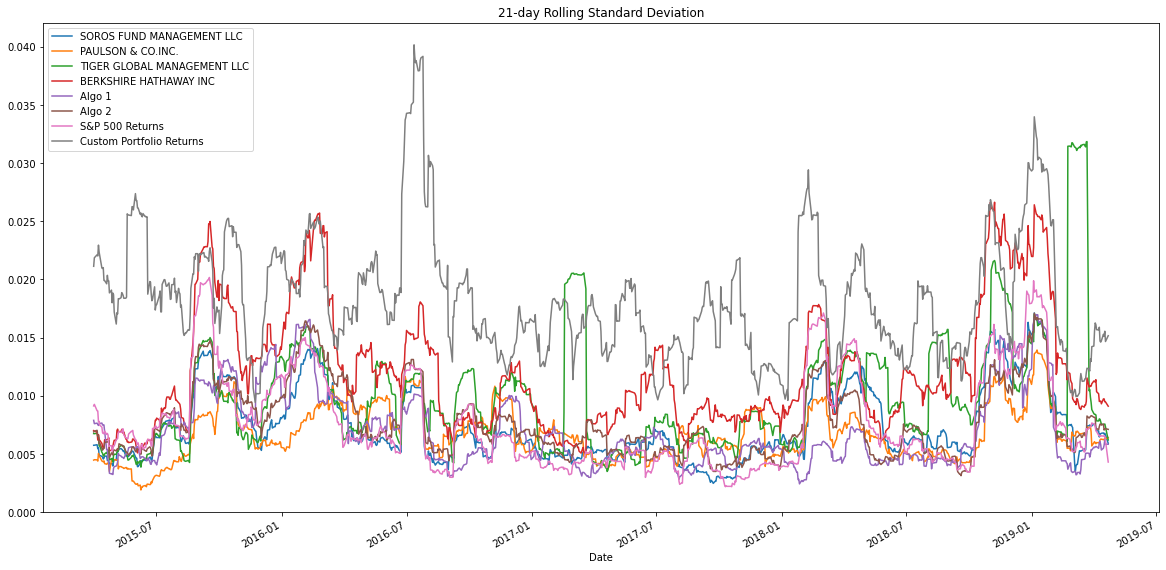

In [143]:
# Calculate rolling standard deviation
rolling_total_portfoilo_std = joined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_total_portfoilo_std.plot(figsize=(20,10), title = '21-day Rolling Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

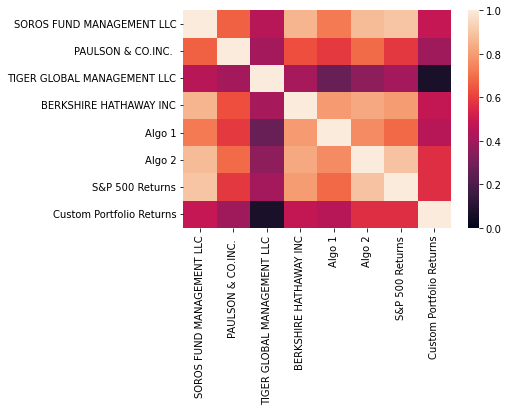

In [155]:
# Calculate and plot the correlation
correlation_total_portfolio = rolling_total_portfoilo_std.corr()
sns.heatmap(correlation_total_portfolio, vmin=-0, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-day Rolling Beta for Custom Portfolio vs. the S&P 500'}, xlabel='Date'>

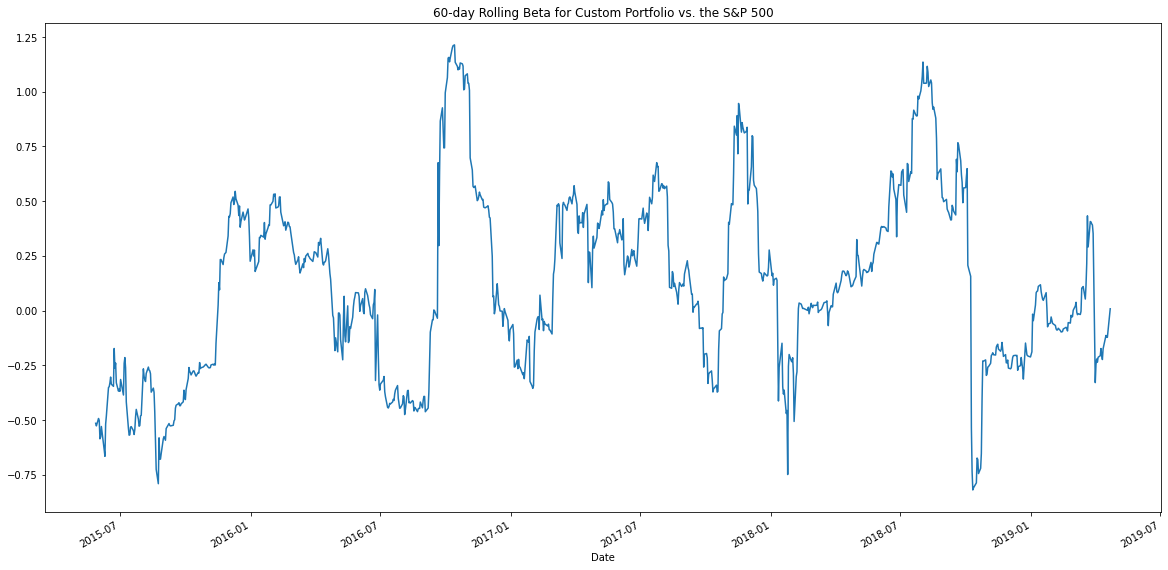

In [147]:
# Calculate and plot Beta

#covariance
covariance_custom_portfolio = joined_df['Custom Portfolio Returns'].rolling(window=60).cov(joined_df['S&P 500 Returns'])

#variance
variance_custom_portfolio = joined_df['S&P 500 Returns'].rolling(window=60).var()

#beta
custom_portfolio_beta = covariance_custom_portfolio / variance_custom_portfolio

#plotting
custom_portfolio_beta.plot(figsize = (20,10), title = '60-day Rolling Beta for Custom Portfolio vs. the S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [148]:
# Calculate Annualized Sharpe Ratios
total_portfolio_sharpe_ratios = ((joined_df.mean()) * 252) / (joined_df.std() * np.sqrt(252))
total_portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
S&P 500 Returns               -0.526730
Custom Portfolio Returns       0.203141
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for all Portfolios'}>

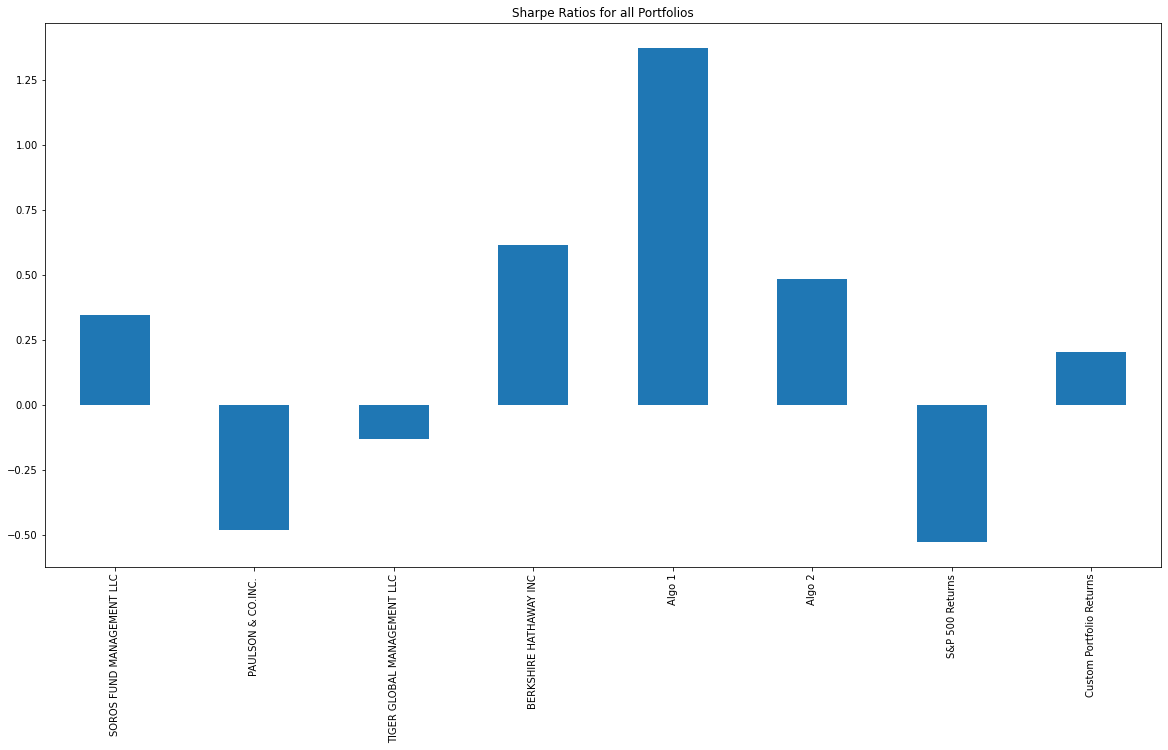

In [149]:
# Visualize the sharpe ratios as a bar plot
total_portfolio_sharpe_ratios.plot(kind = 'bar', figsize = (20,10), title = 'Sharpe Ratios for all Portfolios')

### How does your portfolio do?

Write your answer here!

In [152]:
print(f'My custom portfolio of various airline stocks outperformed the S&P 500, Paulson & Co. Inc., and Tiger Global Management, LLC., however, the other two whale portfolios (Soros Fund and Berkshire Hathaway) as well as both algorithmic options outperformed my custom portfolio.')

My custom portfolio of various airline stocks outperformed the S&P 500, Paulson & Co. Inc., and Tiger Global Management, LLC., however, the other two whale portfolios (Soros Fund and Berkshire Hathaway) as well as both algorithmic options outperformed my custom portfolio.
